In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


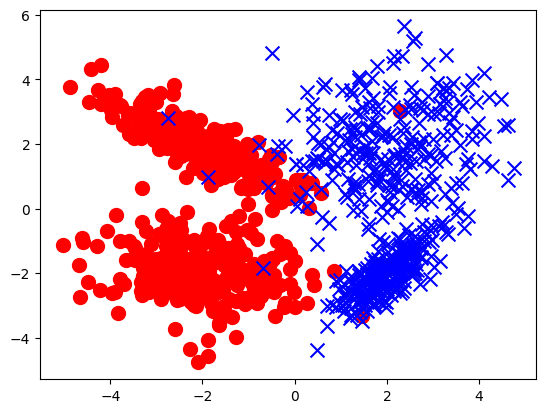

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [5]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
      return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [6]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [7]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [9]:
y_pred_proba = logreg.predict_proba(X)
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

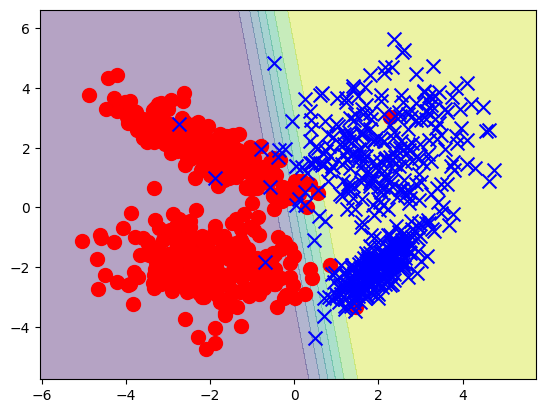

In [10]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [12]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

## дз

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.


In [14]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


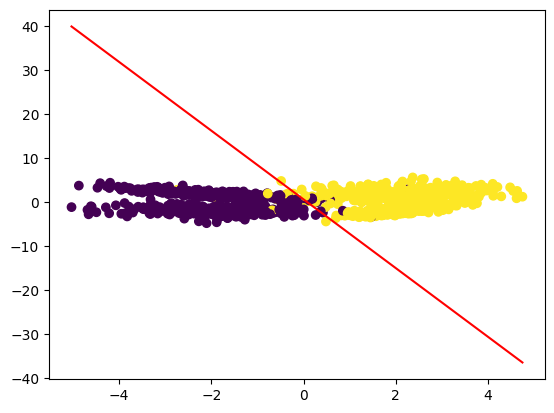

In [21]:
plt.scatter(X[:,0], X[:,1], c=y)
slope = -(model.coef_[0][0] / model.coef_[0][1])
intercept = -(model.intercept_ / model.coef_[0][1])
x_values = np.linspace(X[:, 0].min(), X[:, 0].max())
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.


In [23]:
m = LogReg(90,1000)
print(m.fit(X,y))

None


<ipython-input-5-218d97f8b9e5>:21: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.


In [43]:
class LogRegModified(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        X_with_bias = np.c[np.ones(X.shape[0]), X]
        return self.sigmoid(X_with_bias, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred.astype(int)

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X] # добавление столбца
        m = X_with_bias.shape[1]
        start_b = np.zeros(m)
        self.b = self.optimize(X_with_bias, y, start_b, self._n_iters)


4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.


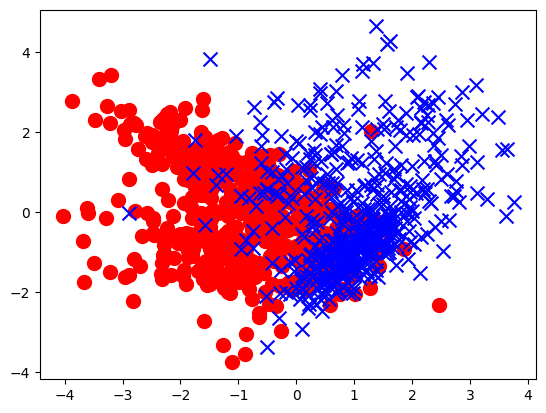

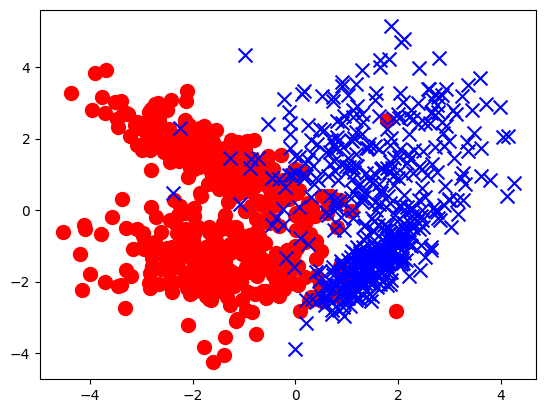

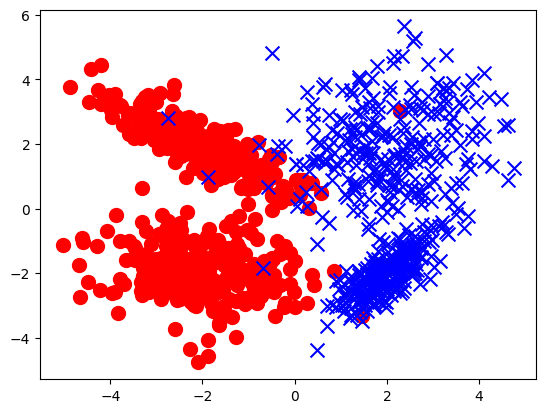

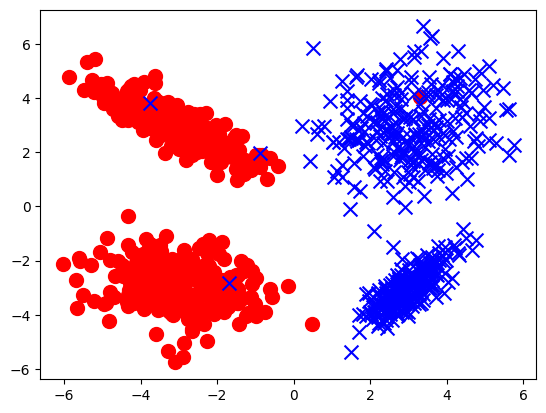

In [28]:
seps = [1,1.5,2,3]

for i in range(len(seps)):
  X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=seps[i],
                            random_state=1)
  plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
  plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
  plt.show()

Если class_sep увеличивается, то классы становятся более легко различимыми, что может привести к лучшей производительности модели

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.


In [36]:
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.472694,2.580527,-1.905853,-1.398943,0.633441,-0.519450,-0.095361,-0.116182,-0.107378,-0.367900
1,-1.314767,-1.302270,2.460454,0.110209,1.002414,-0.673287,-0.741126,-0.498919,1.434897,-1.622041
2,0.860771,-1.819885,1.918754,0.626974,0.422287,-0.643640,-0.615694,0.561775,-1.555137,1.468860
3,-1.038170,-1.901334,-0.859387,1.816778,-0.858449,-0.802652,0.076341,1.891287,1.282932,-0.369103
4,-0.826925,-1.529347,2.381130,0.960666,0.114438,0.275673,0.787996,3.298541,-1.579064,0.531882


In [45]:
new_m = LogisticRegression()
new_m.fit(X,y)
y_pred = new_m.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'Библиотечная модель accuracy = {ac:.2f} F1-score = {f1:.2f}')

Библиотечная модель accuracy = 0.98 F1-score = 0.98


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.


In [46]:
from sklearn.multiclass import OneVsRestClassifier

In [49]:
X,y = make_classification (n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=4,
                           n_clusters_per_class=1,
                           random_state=42)

base = LogisticRegression()
model = OneVsRestClassifier(base)
model.fit(X,y)
pred = model.predict(X)
accuracy_score(y,pred)

0.804

7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.


In [50]:
model.predict_proba(X)

array([[0.62464045, 0.29132207, 0.0244164 , 0.05962109],
       [0.01003393, 0.11777921, 0.11310204, 0.75908482],
       [0.02239852, 0.14006732, 0.12415869, 0.71337547],
       ...,
       [0.38733827, 0.01425977, 0.5591713 , 0.03923066],
       [0.12767117, 0.01698988, 0.68912544, 0.16621351],
       [0.15589738, 0.00615735, 0.7401803 , 0.09776497]])